Index(['Unnamed: 0', 'patient_id', 'drugName', 'condition', 'review', 'rating',
       'date', 'usefulCount', 'review_length'],
      dtype='object')
sentiment
positive    73638
negative    27103
Name: count, dtype: int64
Accuracy: 0.88034145615167
              precision    recall  f1-score   support

    negative       0.83      0.70      0.76      5421
    positive       0.90      0.95      0.92     14728

    accuracy                           0.88     20149
   macro avg       0.86      0.82      0.84     20149
weighted avg       0.88      0.88      0.88     20149



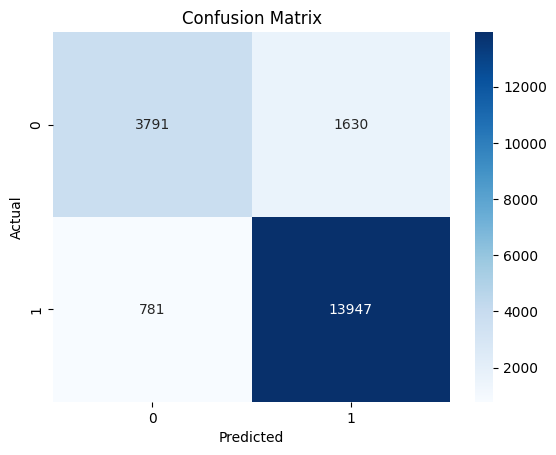

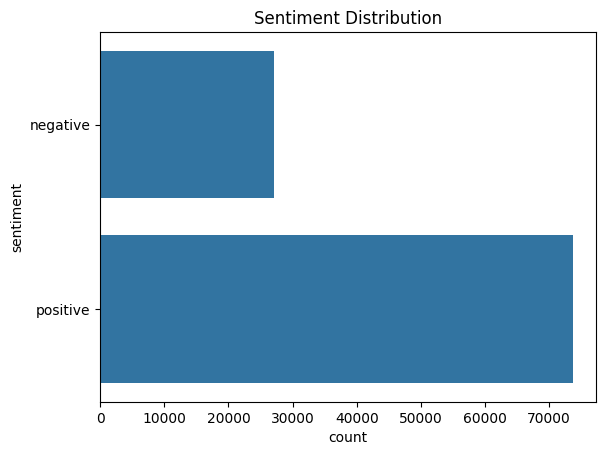

In [7]:
# Experiment: Social Media Analytics for Drug Reviews

# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 2. Load dataset
DATA_PATH = 'drug_review_train.csv'  # replace with your dataset path
df = pd.read_csv(DATA_PATH)
df.head()

# Check columns
print(df.columns)

# 3. Create sentiment label
# Assuming 'rating' column is 1-10
def label_sentiment(r):
    if r >= 7:
        return 'positive'
    elif r <= 4:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['rating'].apply(label_sentiment)

# Filter positive & negative only
df = df[df['sentiment'] != 'neutral']
print(df['sentiment'].value_counts())

# 4. Clean review text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\d+', '', text)
    return text

df['clean_review'] = df['review'].apply(clean_text)

# 5. Train/Test split
X = df['clean_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 6. TF-IDF + Logistic Regression
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)

# 7. Predictions
y_pred = model.predict(X_test_tfidf)

# 8. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 9. Visualize sentiment distribution
sns.countplot(df['sentiment'])
plt.title("Sentiment Distribution")
plt.show()
